#**Regresión Lineal Simple**#

Objetivo : Describir mediante una ecuación la asociación entre los precios de las viviendas de Seattle, EUA y los metros cuadrados.

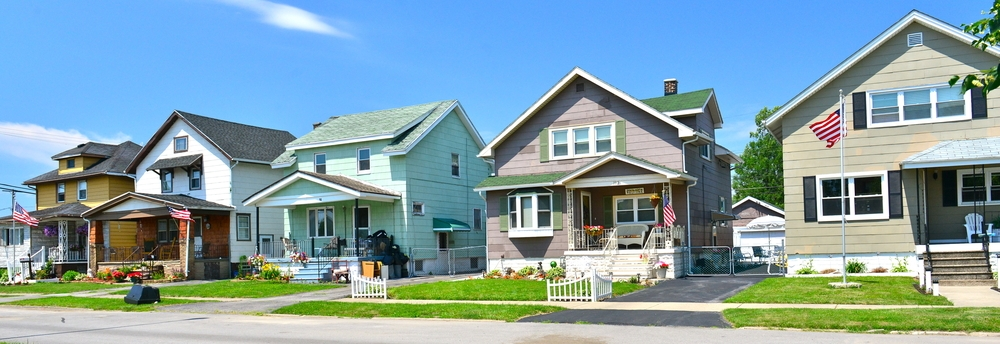

In [ ]:
# Importar las librerías
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model                       # Modelo
from sklearn.model_selection import train_test_split   # Evaluación

In [ ]:
# Importar la base
df = pd.read_csv('sample_data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


(0.0, 8084101.925565317)

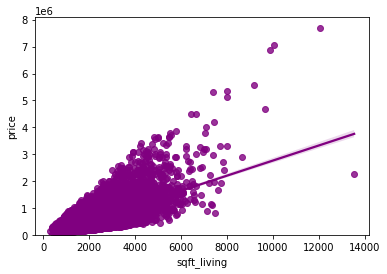

In [ ]:
# Regplot : Grafica los datos y ajusta un modelo de regresión lineal.
sns.regplot( x = "sqft_living", y = "price", data=df , color = 'purple')
plt.ylim(0,)

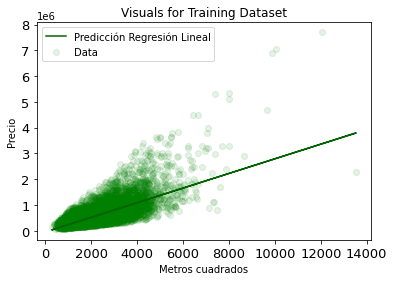

In [ ]:
space = df['sqft_living']
price = df['price']

x = np.array(space).reshape(-1, 1)
y = np.array(price)

# Separando la base en Train and Test
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.20, random_state=0)


# Ajustar un modelo de regresión lineal a la Muestra de Entrenamiento
from sklearn.linear_model import LinearRegression 
lr = LinearRegression()
lr.fit(xtrain, ytrain)

# Prediciendo los precios...
pred = lr.predict(xtest)

# Visualizando los Resultados de Entrenamiento
plt.scatter( xtrain, ytrain, color= 'green', label="Data", alpha=.1)
plt.plot(xtrain, lr.predict(xtrain), color = 'darkgreen', label="Predicción Regresión Lineal")
plt.title ("Visuals for Training Dataset")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend()

plt.show()


¿Qué tanto difieren los dos gráficos entre validación y desempeño?

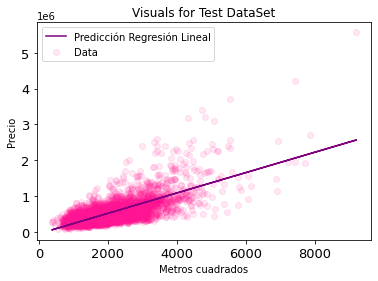

In [ ]:
# Visualizando los Resultados de Validación
plt.scatter(xtest, ytest, color= 'deeppink', label="Data", alpha=.1)
plt.plot(xtest, lr.predict(xtest), color = 'purple', label="Predicción Regresión Lineal")
plt.title("Visuals for Test DataSet")
plt.xlabel("Metros cuadrados")
plt.ylabel("Precio")

plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

plt.legend()

plt.show()

## Ecuación de Regresión Lineal:

In [ ]:
print ("Promedio del Precio en Train Data: {:.2f}".format(ytrain.mean()))
print ("Promedio del Precio en Test Data: {:.2f}".format(ytest.mean()))

print('Intercepto Bo: {:0.3f}'.format(lr.intercept_))
print('Coefficiente B1: {}'.format(lr.coef_))


Promedio del Precio en Train Data: 542799.84
Promedio del Precio en Test Data: 529242.61
Intercepto Bo: -48257.064
Coefficiente B1: [283.96855716]


----

## Métricas: ¿Cómo saber que es un buen modelo?

In [ ]:
# Importar librerías
from sklearn import metrics                            # Métricas


**Root Mean Squared Error (RMSE)**

In [ ]:
pred = lr.predict(xtest)

rmse = float(format(np.sqrt(metrics.mean_squared_error(ytest,pred)),'.3f'))

print('Root Mean Squared Error (RMSE): {}'.format(rmse))

Root Mean Squared Error (RMSE): 248879.061


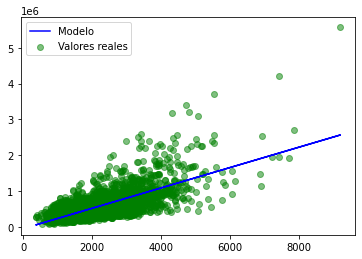

In [ ]:
# RMSE Gráfico
plt.clf()
plt.plot(xtest, pred, color='blue' ,label='Modelo')
plt.scatter(xtest, ytest, c='green', alpha = 0.5, label='Valores reales')

plt.legend()

**R-Squared**

In [ ]:
rtrsm = float(format(lr.score(xtrain, ytrain),'.3f'))
rtesm = float(format(lr.score(xtest, ytest),'.3f'))

print('R-Squared (training): {}'.format(rtrsm))
print('R-Squared (test): {}'.format(rtesm))

R-Squared (training): 0.496
R-Squared (test): 0.479
